This code is for generating and rtaking data for our experiments


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime
from future.utils import iteritems
from builtins import range, input

In [ ]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
   


    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                #here we are using square distance which is monotonically increasing 
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)


MNIST small dataset (from collab)<br/> 

In [ ]:
def get_data(limit=1000):
    print("Reading in and transforming data...")
    df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [ ]:
def MNIST():
    X, Y = get_data(2000)
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, label='train scores')
    plt.plot(ks, test_scores, label='test scores')
    plt.legend()
    plt.show()

Reading in and transforming data...

k = 1
Training time: 0:00:00.000017
Train accuracy: 1.0
Time to compute train accuracy: 0:00:07.235534 Train size: 1000
Test accuracy: 0.89
Time to compute test accuracy: 0:00:07.322758 Test size: 1000

k = 2
Training time: 0:00:00.000010
Train accuracy: 1.0
Time to compute train accuracy: 0:00:07.249803 Train size: 1000
Test accuracy: 0.89
Time to compute test accuracy: 0:00:07.286723 Test size: 1000

k = 3
Training time: 0:00:00.000008
Train accuracy: 0.965
Time to compute train accuracy: 0:00:07.254909 Train size: 1000
Test accuracy: 0.883
Time to compute test accuracy: 0:00:07.361257 Test size: 1000

k = 4
Training time: 0:00:00.000006
Train accuracy: 0.955
Time to compute train accuracy: 0:00:07.299479 Train size: 1000
Test accuracy: 0.896
Time to compute test accuracy: 0:00:07.332578 Test size: 1000

k = 5
Training time: 0:00:00.000009
Train accuracy: 0.942
Time to compute train accuracy: 0:00:07.299993 Train size: 1000
Test accuracy: 0.882
Ti

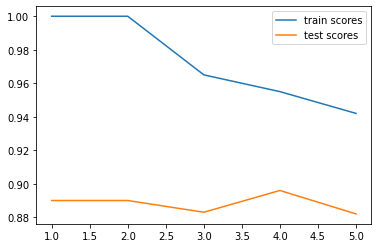

In [ ]:
MNIST()

XOR dataset (generated)

In [ ]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

In [ ]:
def XOR():
    X, Y = get_xor()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Accuracy:", model.score(X, Y))

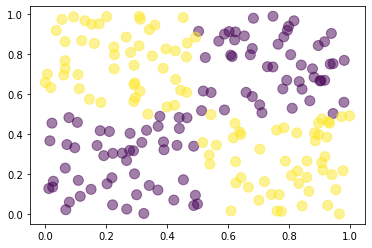

Accuracy: 0.98


In [ ]:
XOR()

Donut dataset (generated)

In [ ]:
def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

In [ ]:
def DONUT():
    X, Y = get_donut()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Accuracy:", model.score(X, Y))

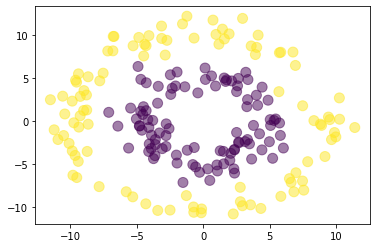

Accuracy: 0.995


In [ ]:
DONUT()

In [ ]:
# X,Y=get_donut()
# print(X.shape)
# import matplotlib.pyplot as plt
# print(X[:,:1])
# plt.scatter(X[:,1:],X[:,:1])
# plt.show()

Case when KNN fails(grid-dataset) .


In [ ]:
def knnfail():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            Y[n] = t
            n += 1
            t = (t + 1) % 2 # alternate between 0 and 1
        start_t = (start_t + 1) % 2
    return X, Y


def knn_fail():
    X, Y = knnfail()

    # display the data
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()

    # get the accuracy
    model = KNN(3)
    model.fit(X, Y)
    print("Train accuracy:", model.score(X, Y))

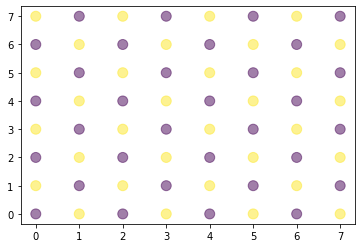

Train accuracy: 0.0


In [ ]:
knn_fail()